In [1]:
#importing all the required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import dateutil.parser

In [2]:
import warnings
warnings.filterwarnings('ignore')

#extracting data from the csv
data_dir='E:/pro_cs244/crime_data.csv'

crime_data = pd.read_csv(data_dir)
print(len(crime_data))

794446


In [3]:
#dropping incomplete data points
df=crime_data.dropna()
crime_data = df
crime_data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10853390,JA157081,02/17/2017 12:20:00 PM,039XX W CHICAGO AVE,031A,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,False,False,...,37.0,23.0,03,1150018.0,1905056.0,2017,02/06/2020 03:54:12 PM,41.895384,-87.724470,"(41.895383921, -87.724469836)"
3,11118466,JA470941,10/14/2017 07:20:00 AM,086XX S HALSTED ST,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,21.0,71.0,02,1172479.0,1847789.0,2017,02/05/2020 03:52:05 PM,41.737771,-87.643664,"(41.737770715, -87.643664418)"
8,11931186,JC558227,01/01/2017 12:00:00 AM,062XX S WHIPPLE ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,16.0,66.0,17,1157124.0,1863026.0,2017,02/04/2020 03:56:47 PM,41.779907,-87.699510,"(41.779907312, -87.699510196)"
10,10922382,JA236370,04/23/2017 06:30:00 PM,023XX S ALBANY AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,...,12.0,30.0,03,1156060.0,1888349.0,2017,02/04/2020 03:56:47 PM,41.849418,-87.702730,"(41.849418392, -87.702729725)"
19,23173,JA173527,03/03/2017 01:45:00 PM,073XX S KENWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,8.0,43.0,01A,1186479.0,1856599.0,2017,01/30/2020 03:54:03 PM,41.761627,-87.592095,"(41.761626906, -87.592094503)"


In [4]:
#extracting year from the 'Date' column
def make_window(row):
    date, time, half = row.split()
    h = date[6:10]
    return h

#forming a new column named 'Year' in the dataframe
crime_data['Year'] = crime_data.apply(lambda row: make_window(row['Date']), axis=1)
crime_data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10853390,JA157081,02/17/2017 12:20:00 PM,039XX W CHICAGO AVE,031A,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,False,False,...,37.0,23.0,03,1150018.0,1905056.0,2017,02/06/2020 03:54:12 PM,41.895384,-87.724470,"(41.895383921, -87.724469836)"
3,11118466,JA470941,10/14/2017 07:20:00 AM,086XX S HALSTED ST,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,21.0,71.0,02,1172479.0,1847789.0,2017,02/05/2020 03:52:05 PM,41.737771,-87.643664,"(41.737770715, -87.643664418)"
8,11931186,JC558227,01/01/2017 12:00:00 AM,062XX S WHIPPLE ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,16.0,66.0,17,1157124.0,1863026.0,2017,02/04/2020 03:56:47 PM,41.779907,-87.699510,"(41.779907312, -87.699510196)"
10,10922382,JA236370,04/23/2017 06:30:00 PM,023XX S ALBANY AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,...,12.0,30.0,03,1156060.0,1888349.0,2017,02/04/2020 03:56:47 PM,41.849418,-87.702730,"(41.849418392, -87.702729725)"
19,23173,JA173527,03/03/2017 01:45:00 PM,073XX S KENWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,8.0,43.0,01A,1186479.0,1856599.0,2017,01/30/2020 03:54:03 PM,41.761627,-87.592095,"(41.761626906, -87.592094503)"


In [5]:
#calculating the size of data points of each year
print(df.groupby('Year').size())

Year
2017    264116
2018    262787
2019    256023
dtype: int64


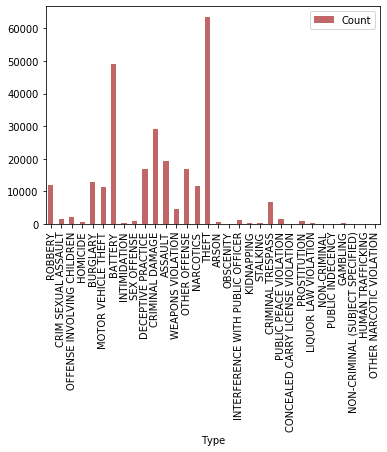

In [6]:
#calculation for the year 2017
get_type1 = []

#applying nested for loop to calculate the occurance of each type of crime 
for i in range(0,264116):
    primary_type = crime_data['Primary Type'].iloc[i]
    get_index = -1
    
    for j in range(0, len(get_type1)):
        if (get_type1[j][0] == primary_type):
            get_index = j
            get_type1[j][1]+=1
    
    if get_index == -1:
        get_type1.append([primary_type, 1])

        
#plot for 2017 data
get_type1
added_data1 = pd.DataFrame(columns=['Type', 'Count'], data=get_type1)
added_data1.head()
added_data1.plot(x='Type', y='Count', kind='bar',color=(0.6, 0.0, 0.0, 0.6)) 
plt.title("2017 Data PLot")
plt.show()

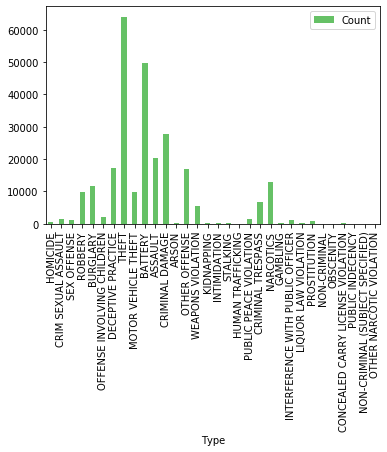

In [7]:
#calculation for the year 2018
get_type2 = []

#applying nested for loop to calculate the occurance of each type of crime
for i in range(264116,526900):
    primary_type = crime_data['Primary Type'].iloc[i]
    get_index = -1
    
    for j in range(0, len(get_type2)):
        if (get_type2[j][0] == primary_type):
            get_index = j
            get_type2[j][1]+=1
    
    if get_index == -1:
        get_type2.append([primary_type, 1])

        
#plot for 2018 data
get_type2
added_data2 = pd.DataFrame(columns=['Type', 'Count'], data=get_type2)
added_data2.head()
added_data2.plot(x='Type', y='Count', kind='bar',color=(0.0, 0.6, 0.0, 0.6)) 
plt.title("2018 Data Plot")
plt.show()

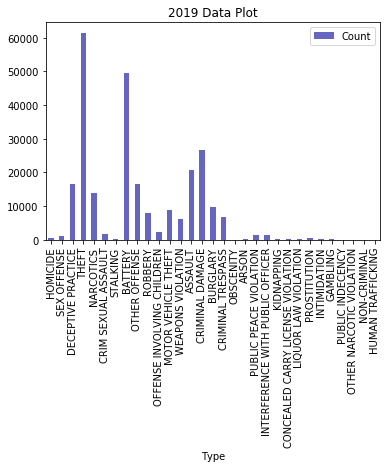

In [14]:
#calculation for the year 2019
get_type3 = []

#applying nested for loop to calculate the occurance of each type of crime
for i in range(526900,782923):
    primary_type = crime_data['Primary Type'].iloc[i]
    get_index = -1
    
    for j in range(0, len(get_type3)):
        if (get_type3[j][0] == primary_type):
            get_index = j
            get_type3[j][1]+=1
    
    if get_index == -1:
        get_type3.append([primary_type, 1])

        
#plot for 2019 data
get_type3
added_data3 = pd.DataFrame(columns=['Type', 'Count'], data=get_type3)
added_data3.head()
added_data3.plot(x='Type', y='Count', kind='bar',color=(0.0 ,0.0, 0.6,0.6)) 
plt.title("2019 Data Plot")
plt.show()

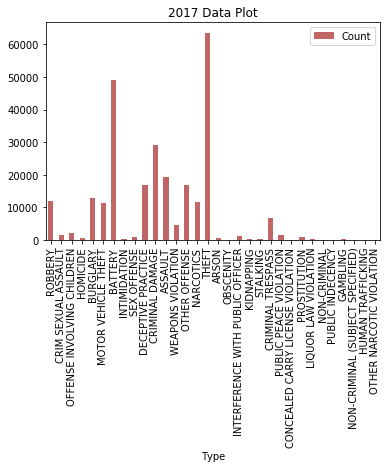

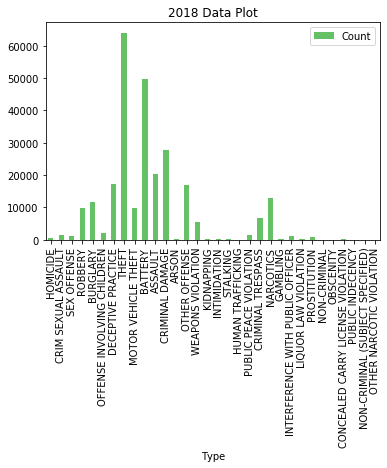

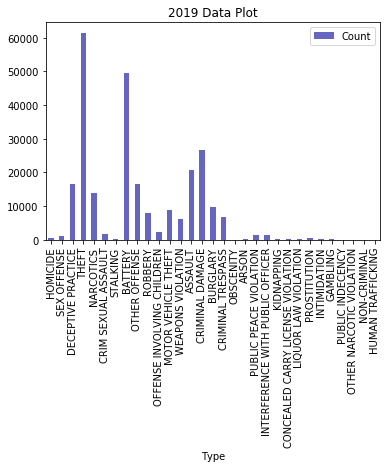

In [15]:
#seperate plot for each year(2017,2018,2019)
added_data1.plot(x='Type', y='Count', kind='bar',color=(0.6, 0.0, 0.0, 0.6))
plt.title("2017 Data Plot")
added_data2.plot(x='Type', y='Count', kind='bar',color=(0.0, 0.6, 0.0, 0.6))
plt.title("2018 Data Plot")
added_data3.plot(x='Type', y='Count', kind='bar',color=(0.0 ,0.0, 0.6,0.6))
plt.title("2019 Data Plot")
plt.show()

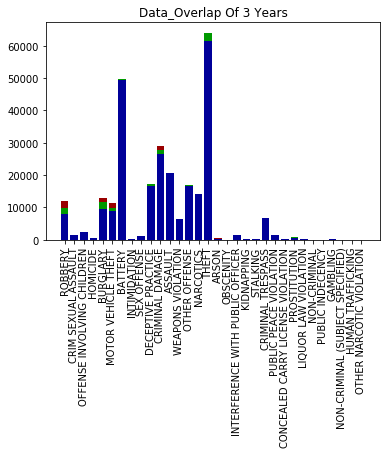

In [16]:
#Overalling bar graph plot of 3 years together
Type  = added_data1['Type']
data1 = added_data1['Count']
data2 = added_data2['Count']
data3 = added_data3['Count']

x = np.arange(len(set(Type)))
plt.bar(added_data1['Type'],added_data1['Count'],color = (0.6,0.0,0.0,1.0))
plt.bar(added_data2['Type'],added_data2['Count'],color = (0.0,0.6,0.0,1.0))
plt.bar(added_data3['Type'],added_data3['Count'],color = (0.0,0.0,0.6,1.0))

plt.title("Data_Overlap Of 3 Years")
plt.xticks(rotation = 90)
plt.show()

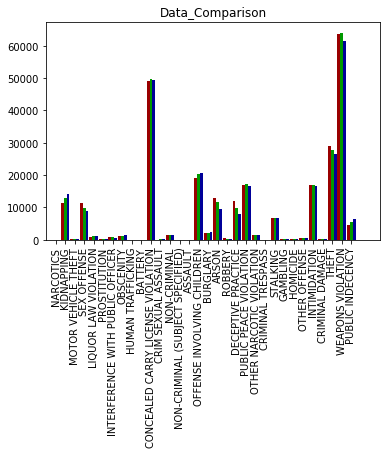

In [17]:
#side by side bar graph plot of 3 years for better comparison of increament and decreament
dict = {}
for count ,obj in enumerate(set((added_data1['Type']))):
    dict [obj] = count+1

width = 0.9
plt.bar(added_data1['Type'].map(dict)-width/3,added_data1['Count'],color = (0.6,0.0,0.0,1.0),width=0.3,align = 'center')
plt.bar(added_data2['Type'].map(dict),added_data2['Count'],color = (0.0,0.6,0.0,1.0),width=0.3,align = 'center')
plt.bar(added_data3['Type'].map(dict)+width/3,added_data3['Count'],color = (0.0,0.0,0.6,1.0),width=0.3,align = 'center')

plt.title("Data_Comparison")
plt.xticks(np.arange(len(set(Type))),rotation = 90,labels = [key for key in dict])
plt.show()